 # Problema de la Mochila

 El problema de la mochila surge en areas de investigacion de operaciones en las cuales se requiere alojar un numero de items con el maximo valor bajo ciertas restricciones. Si hacemos $X=\{x_1,\ldots,x_n\}$ un conjunto de items, con $x_i \in \{0,1\}$ siendo una variable binaria que indica la presencia del item $i$, $W=\{w_1,\ldots,w_n\}$ los pesos de los items y $V=\{v_1,\ldots,v_n\}$ el valor asociado a cada uno de los items, el problema de optimizacion puede ser escrito como:

 $F(X)=\operatorname{max}\sum_i x_i*v_i$
  
  Dado
  
 $\sum_i x_i*w_i < W_{max}$
  

In [ ]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [ ]:
list(powerset({'A','B','C','D'}))

[(),
 ('B',),
 ('D',),
 ('C',),
 ('A',),
 ('B', 'D'),
 ('B', 'C'),
 ('B', 'A'),
 ('D', 'C'),
 ('D', 'A'),
 ('C', 'A'),
 ('B', 'D', 'C'),
 ('B', 'D', 'A'),
 ('B', 'C', 'A'),
 ('D', 'C', 'A'),
 ('B', 'D', 'C', 'A')]

In [ ]:
2**5

32

In [ ]:
import random
import numpy as np

n=5
W = [random.randint(20, 1000) for _ in range(n)]  # peso
V  = [random.randint(10, 800) for _ in range(n)] # valor
W_max=1000
print('pesos : ',W)
print('valores : ',V)
print('------------------------------')
for i,p in enumerate(powerset(range(n))):
    print('Mochila {0}, items : {1}, valor : {2}, peso : {3}'.format(
            i,p,np.sum([V[i] for i in p]),np.sum([W[i] for i in p])))

pesos :  [948, 751, 91, 751, 277]
valores :  [604, 545, 523, 377, 22]
------------------------------
Mochila 0, items : (), valor : 0.0, peso : 0.0
Mochila 1, items : (0,), valor : 604, peso : 948
Mochila 2, items : (1,), valor : 545, peso : 751
Mochila 3, items : (2,), valor : 523, peso : 91
Mochila 4, items : (3,), valor : 377, peso : 751
Mochila 5, items : (4,), valor : 22, peso : 277
Mochila 6, items : (0, 1), valor : 1149, peso : 1699
Mochila 7, items : (0, 2), valor : 1127, peso : 1039
Mochila 8, items : (0, 3), valor : 981, peso : 1699
Mochila 9, items : (0, 4), valor : 626, peso : 1225
Mochila 10, items : (1, 2), valor : 1068, peso : 842
Mochila 11, items : (1, 3), valor : 922, peso : 1502
Mochila 12, items : (1, 4), valor : 567, peso : 1028
Mochila 13, items : (2, 3), valor : 900, peso : 842
Mochila 14, items : (2, 4), valor : 545, peso : 368
Mochila 15, items : (3, 4), valor : 399, peso : 1028
Mochila 16, items : (0, 1, 2), valor : 1672, peso : 1790
Mochila 17, items : (0, 1,

In [ ]:
# A Dynamic Programming based Python Program for 0-1 Knapsack problem
# Returns the maximum value that can be put in a knapsack of capacity W
def knapsack(W_max, W, V, n):
    C = [[0 for x in range(W_max+1)] for x in range(n+1)]
    # Build table in bottom up manner
    for i in range(n+1):
        for w in range(W_max+1):
            if i==0 or w==0:
                C[i][w] = 0
            elif W[i-1] <= w:
                C[i][w] = max(V[i-1] + C[i-1][w-W[i-1]],  C[i-1][w])
            else:
                C[i][w] = C[i-1][w]

    return C

In [ ]:
C=knapsack(W_max,W,V,len(V))

In [ ]:
np.asarray(C).shape

(6, 1001)

In [ ]:
C[-1][-1]

1068

In [ ]:
def knapsack_greedy(W, wt, val, n):
    # elements in the knapsack (the order must be consequent)
    v_in_knapsack = []
    w_in_knapsack = []
    # current weight of all the elements put in the knapsack so far
    weight_in_knapsack = 0
    # sort elements by purity in descendant order
    for v_i,w_i in sorted(zip(val,wt),key=lambda x:x[0]/x[1] if x[1]!=0 else x[0], reverse=True):
        if w_i + weight_in_knapsack <= W:  # if I can carry it,
            v_in_knapsack.append(v_i)
            w_in_knapsack.append(w_i)
            weight_in_knapsack += w_i

    return v_in_knapsack, w_in_knapsack

In [ ]:
v_c,w_c=knapsack_greedy(W_max,W,V,len(V))

In [ ]:
v_c,w_c

([523, 545], [91, 751])

In [ ]:
print("valor mochila : {}".format(np.sum(v_c)))

valor mochila : 1068


In [ ]:
print("pesos mochila : {}".format(np.sum(w_c)))

pesos mochila : 842


In [ ]:
# Example from Grokking Algorithms. p161
import numpy as np

values = [1500,3000,2000]
weights = [[1,4,3]]
capacities = [4]

C=knapsack(capacities[0],weights[0],values,len(values))

print(np.asarray(C))

[[   0    0    0    0    0]
 [   0 1500 1500 1500 1500]
 [   0 1500 1500 1500 3000]
 [   0 1500 1500 2000 3500]]


In [ ]:
v_c,w_c=knapsack_greedy(capacities[0],weights[0],values,len(values))

print(v_c)
print(w_c)

[1500, 2000]
[1, 3]


In [ ]:
# Example from https://developers.google.com/optimization/bin/knapsack

values = [
    360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
    78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
    87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
    312
]
weights = [[
    7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
    42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
    3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13
]]
capacities = [850]

C=knapsack(capacities[0],weights[0],values,len(values))
print('Total value = {0}'.format(C[-1][-1]))
print('Total weight = {0}'.format(len(C[0])-1))

Total value = 7534
Total weight = 850


In [ ]:
import numpy as np

v_c,w_c=knapsack_greedy(capacities[0],weights[0],values,len(values))

print('Total value = ',np.sum(v_c))
print('Total weight = ',np.sum(w_c))

Total value =  7534
Total weight =  850


In [ ]:
import time
import random
n_dims=[32,64,128,512]
samples=100

dp_time={n:list() for n in n_dims}
greedy_time={n:list()for n in n_dims}
global_optimimum={n:list()for n in n_dims}


for n in n_dims:
  print('Knapsack #Items: {0}'.format(n))
  for s in range(samples):
    W = [random.randint(20, 1000) for _ in range(n)]  # peso
    V  = [random.randint(10, 800) for _ in range(n)] # valor
    W_max=1000
    t1=time.time()
    v_c,w_c=knapsack_greedy(W_max,W,V,len(V))
    greedy_time[n].append(time.time()-t1)
    t2=time.time()
    C=knapsack(W_max,W,V,len(V))
    dp_time[n].append(time.time()-t2)
    global_optimimum[n].append(C[-1][-1]==np.sum(v_c))



Knapsack #Items: 32
Knapsack #Items: 64
Knapsack #Items: 128
Knapsack #Items: 512


In [ ]:
df_greedy.head()

,32,64,128,512,method
0,0.000042,0.000048,0.000098,0.000279,greedy
1,0.000039,0.000054,0.000089,0.000293,greedy
2,0.000032,0.000058,0.000096,0.000299,greedy
3,0.000039,0.000082,0.000164,0.000297,greedy
4,0.000036,0.000055,0.000089,0.000287,greedy


In [ ]:
import pandas as pd

df_dp=pd.DataFrame(dp_time)
df_greedy=pd.DataFrame(greedy_time)
df_optimum=pd.DataFrame(global_optimimum)
df_greedy['method']='greedy'
df_dp['method']='dynamic_programming'

df_results=pd.concat([df_greedy,df_dp],axis=0)
df=pd.melt(df_results, id_vars=['method'], value_vars=n_dims)
df['method']=df['method'].astype('category')


In [ ]:
df

,method,variable,value
0,greedy,32,0.000042
1,greedy,32,0.000039
2,greedy,32,0.000032
3,greedy,32,0.000039
4,greedy,32,0.000036
...,...,...,...
795,dynamic_programming,512,0.230800
796,dynamic_programming,512,0.241658
797,dynamic_programming,512,0.235670
798,dynamic_programming,512,0.228883


In [ ]:
df_group=df.groupby(['variable','method'])

In [ ]:
df_group.mean()

value
variable method                       
32       dynamic_programming  0.014666
         greedy               0.000039
64       dynamic_programming  0.043754
         greedy               0.000075
128      dynamic_programming  0.072382
         greedy               0.000112
512      dynamic_programming  0.266183
         greedy               0.000326

In [ ]:
df_optimum.head()

,32,64,128,512
0,False,False,True,False
1,True,True,False,False
2,False,False,True,True
3,False,False,True,True
4,True,False,True,False


In [ ]:
df_optimum.head().mean()

32     0.4
64     0.2
128    0.8
512    0.4
dtype: float64

Text(0.5, 1.0, 'Knapsack Greedy/Dynamic Programming')

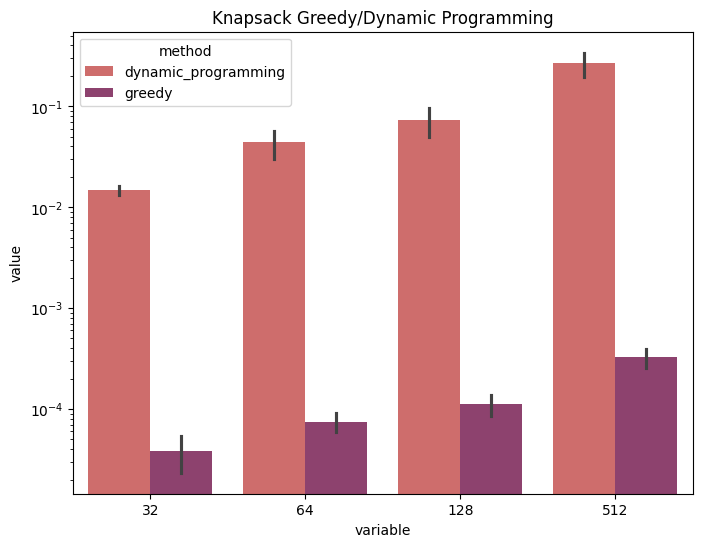

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8, 6))
g=sns.barplot(
    x="variable", y="value",
    data=df, hue="method",errorbar="sd",palette='flare'
)
g.set_yscale("log")
g.set_title("Knapsack Greedy/Dynamic Programming")